In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

In [3]:
# Define a function to create synthetic data (or load your actual data)
def create_synthetic_data():
    np.random.seed(42)
    data = {
        'Al': np.random.uniform(99.4, 99.7, 200),
        'Si': np.random.uniform(0.1, 0.3, 200),
        'Fe': np.random.uniform(0.1, 0.4, 200),
        'Casting Temp': np.random.uniform(690, 720, 200),
        'Cooling Water Temp': np.random.uniform(15, 25, 200),
        'Casting Speed': np.random.uniform(1.8, 2.2, 200),
        'Entry Temp': np.random.uniform(500, 550, 200),
        'Emulsion Temp': np.random.uniform(60, 80, 200),
        'Emulsion Pressure': np.random.uniform(2, 4, 200),
        'Quench Water Pressure': np.random.uniform(3, 5, 200),
    }
    df = pd.DataFrame(data)
    # Example formulas for synthetic values
    df['Elongation'] = 15 - 0.4 * (df['Al'] - 99.4) + 0.2 * df['Casting Temp'] - 0.15 * df['Cooling Water Temp'] + 0.1 * df['Casting Speed'] - 0.05 * df['Entry Temp'] + 0.08 * df['Emulsion Temp'] - 0.03 * df['Emulsion Pressure'] + 0.05 * df['Quench Water Pressure']
    df['UTS'] = 150 + 0.5 * (df['Al'] - 99.4) - 0.2 * df['Casting Temp'] + 0.15 * df['Cooling Water Temp'] - 0.1 * df['Casting Speed'] + 0.1 * df['Entry Temp'] - 0.05 * df['Emulsion Temp'] + 0.02 * df['Emulsion Pressure'] - 0.1 * df['Quench Water Pressure']
    df['Conductivity'] = 60 + 0.3 * (df['Al'] - 99.4) - 0.1 * df['Casting Temp'] + 0.05 * df['Cooling Water Temp'] - 0.02 * df['Casting Speed'] + 0.05 * df['Entry Temp'] - 0.03 * df['Emulsion Temp'] + 0.01 * df['Emulsion Pressure'] - 0.05 * df['Quench Water Pressure']
    
    return df

df = create_synthetic_data()
df.to_csv("alum.csv")

In [4]:
# Step 1: Load and inspect the dataset
df = create_synthetic_data()

# Check for missing values
print(df.isnull().sum())  # No missing values in this synthetic dataset

# Descriptive statistics of the dataset
print(df.describe())

Al                       0
Si                       0
Fe                       0
Casting Temp             0
Cooling Water Temp       0
Casting Speed            0
Entry Temp               0
Emulsion Temp            0
Emulsion Pressure        0
Quench Water Pressure    0
Elongation               0
UTS                      0
Conductivity             0
dtype: int64
               Al          Si          Fe  Casting Temp  Cooling Water Temp  \
count  200.000000  200.000000  200.000000    200.000000          200.000000   
mean    99.545202    0.200875    0.256202    704.363134           19.634575   
std      0.088467    0.058600    0.092193      8.365037            2.853328   
min     99.401657    0.101012    0.103251    690.543306           15.046320   
25%     99.468575    0.152293    0.176656    697.079198           17.094008   
50%     99.548346    0.208328    0.257620    704.013840           19.433843   
75%     99.627058    0.248440    0.343334    711.732189           21.899759   
max 

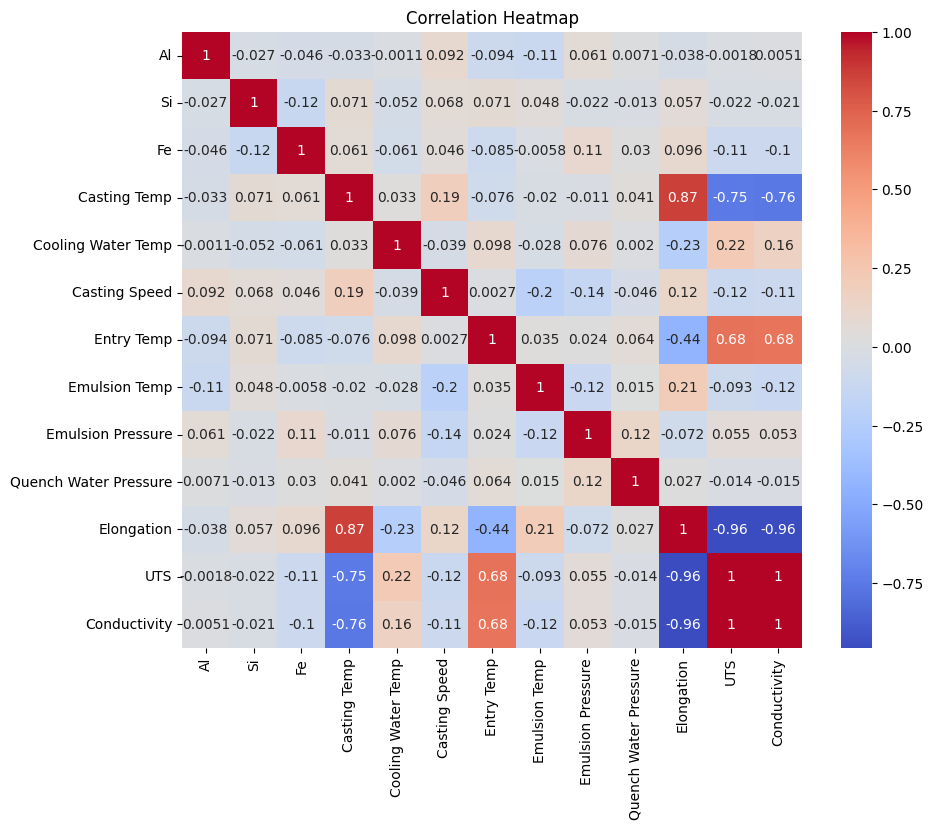

In [5]:
# Step 2: Correlation Analysis for Feature Selection
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# Step 3: PCA for dimensionality reduction (optional)
X = df.drop(columns=['UTS', 'Elongation', 'Conductivity'])
y_uts = df['UTS']
y_elongation = df['Elongation']
y_conductivity = df['Conductivity']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance by principal components: {pca.explained_variance_ratio_}")


Explained variance by principal components: [0.13591456 0.12832003 0.1178106  0.11268942 0.10225656]


In [9]:
# Fit Lasso for UTS
lasso_uts = Lasso(alpha=0.01)
lasso_uts.fit(X, df['UTS'])
lasso_coef_uts = pd.Series(lasso_uts.coef_, index=X.columns)

# Fit Lasso for Elongation
lasso_elongation = Lasso(alpha=0.01)
lasso_elongation.fit(X, df['Elongation'])
lasso_coef_elongation = pd.Series(lasso_elongation.coef_, index=X.columns)

# Fit Lasso for Conductivity
lasso_conductivity = Lasso(alpha=0.01)
lasso_conductivity.fit(X, df['Conductivity'])
lasso_coef_conductivity = pd.Series(lasso_conductivity.coef_, index=X.columns)

# You can plot each of these coefficients individually if needed.


In [10]:
# Check for missing values
print(df.isnull().sum())

# If there are missing values, fill them with the mean (or other strategy)
df.fillna(df.mean(), inplace=True)

# Alternatively, you can drop rows with missing values:
# df.dropna(inplace=True)

# Verify that no missing values remain
print(df.isnull().sum())


Al                       0
Si                       0
Fe                       0
Casting Temp             0
Cooling Water Temp       0
Casting Speed            0
Entry Temp               0
Emulsion Temp            0
Emulsion Pressure        0
Quench Water Pressure    0
Elongation               0
UTS                      0
Conductivity             0
dtype: int64
Al                       0
Si                       0
Fe                       0
Casting Temp             0
Cooling Water Temp       0
Casting Speed            0
Entry Temp               0
Emulsion Temp            0
Emulsion Pressure        0
Quench Water Pressure    0
Elongation               0
UTS                      0
Conductivity             0
dtype: int64


In [11]:
# Step 5: Model Training and Evaluation

# Split data into training and testing sets
# Split for UTS
X_train, X_test, y_train_uts, y_test_uts = train_test_split(X, y_uts, test_size=0.2, random_state=42)

# Split for Elongation
X_train, X_test, y_train_elongation, y_test_elongation = train_test_split(X, y_elongation, test_size=0.2, random_state=42)

# Split for Conductivity
X_train, X_test, y_train_conductivity, y_test_conductivity = train_test_split(X, y_conductivity, test_size=0.2, random_state=42)

# Scale the features for models like Neural Network and SVM
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# ====================== Random Forest ====================== #

# Train and evaluate for UTS - Random Forest
rf_uts = RandomForestRegressor()
rf_uts.fit(X_train, y_train_uts)
y_pred_uts_rf = rf_uts.predict(X_test)
mse_uts_rf = mean_squared_error(y_test_uts, y_pred_uts_rf)
r2_uts_rf = r2_score(y_test_uts, y_pred_uts_rf)

# Train and evaluate for Elongation - Random Forest
rf_elongation = RandomForestRegressor()
rf_elongation.fit(X_train, y_train_elongation)
y_pred_elongation_rf = rf_elongation.predict(X_test)
mse_elongation_rf = mean_squared_error(y_test_elongation, y_pred_elongation_rf)
r2_elongation_rf = r2_score(y_test_elongation, y_pred_elongation_rf)

# Train and evaluate for Conductivity - Random Forest
rf_conductivity = RandomForestRegressor()
rf_conductivity.fit(X_train, y_train_conductivity)
y_pred_conductivity_rf = rf_conductivity.predict(X_test)
mse_conductivity_rf = mean_squared_error(y_test_conductivity, y_pred_conductivity_rf)
r2_conductivity_rf = r2_score(y_test_conductivity, y_pred_conductivity_rf)

# Random Forest Results
print(f"Random Forest - UTS: MSE = {mse_uts_rf}, R² = {r2_uts_rf}")
print(f"Random Forest - Elongation: MSE = {mse_elongation_rf}, R² = {r2_elongation_rf}")
print(f"Random Forest - Conductivity: MSE = {mse_conductivity_rf}, R² = {r2_conductivity_rf}")

Random Forest - UTS: MSE = 0.6154872916447831, R² = 0.9107488350235246
Random Forest - Elongation: MSE = 0.4867151808597675, R² = 0.9036293045141299
Random Forest - Conductivity: MSE = 0.12835535433794393, R² = 0.9231035315926552


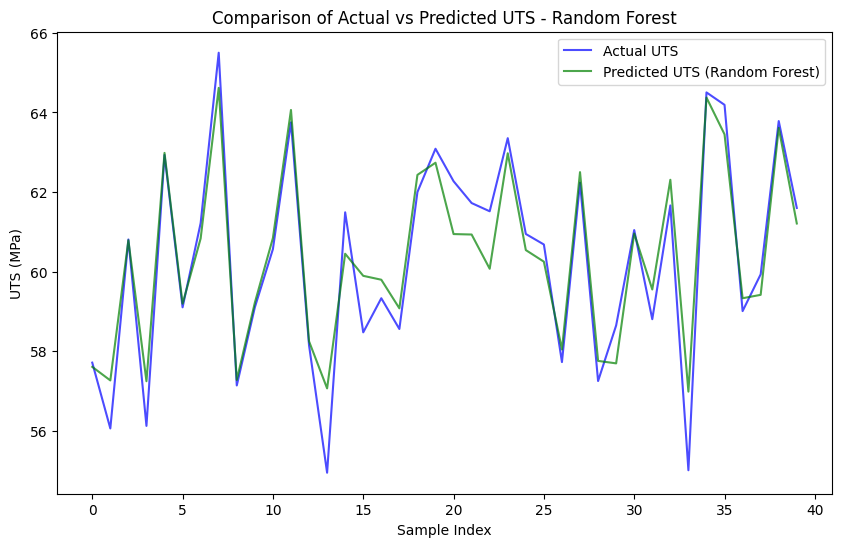

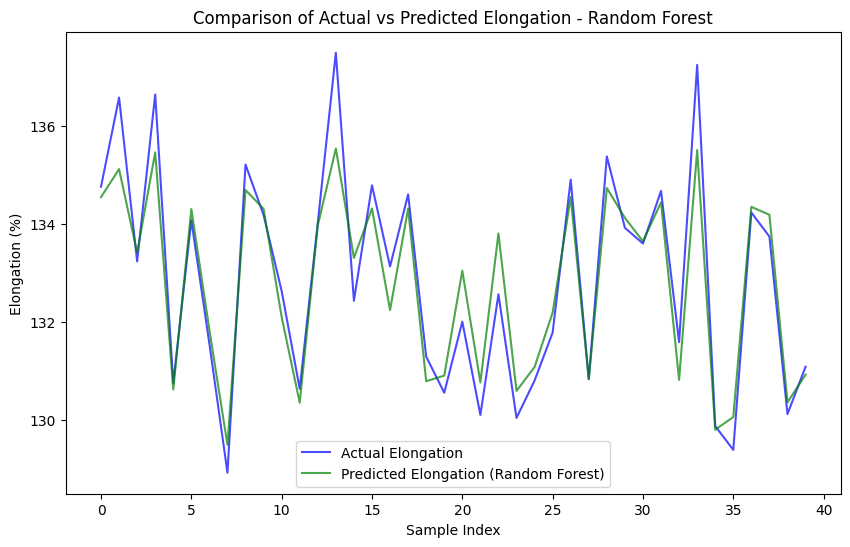

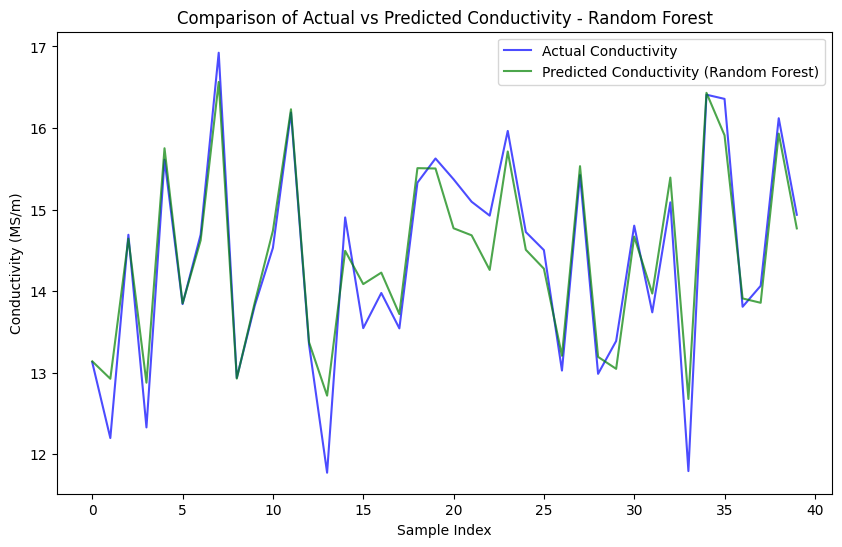

In [13]:
# Plot for UTS
plt.figure(figsize=(10, 6))
plt.plot(y_test_uts.values, label="Actual UTS", color="blue", alpha=0.7)
plt.plot(y_pred_uts_rf, label="Predicted UTS (Random Forest)", color="green", alpha=0.7)
plt.title('Comparison of Actual vs Predicted UTS - Random Forest')
plt.xlabel('Sample Index')
plt.ylabel('UTS (MPa)')
plt.legend()
plt.show()

# Plot for Elongation
plt.figure(figsize=(10, 6))
plt.plot(y_test_elongation.values, label="Actual Elongation", color="blue", alpha=0.7)
plt.plot(y_pred_elongation_rf, label="Predicted Elongation (Random Forest)", color="green", alpha=0.7)
plt.title('Comparison of Actual vs Predicted Elongation - Random Forest')
plt.xlabel('Sample Index')
plt.ylabel('Elongation (%)')
plt.legend()
plt.show()

# Plot for Conductivity
plt.figure(figsize=(10, 6))
plt.plot(y_test_conductivity.values, label="Actual Conductivity", color="blue", alpha=0.7)
plt.plot(y_pred_conductivity_rf, label="Predicted Conductivity (Random Forest)", color="green", alpha=0.7)
plt.title('Comparison of Actual vs Predicted Conductivity - Random Forest')
plt.xlabel('Sample Index')
plt.ylabel('Conductivity (MS/m)')
plt.legend()
plt.show()

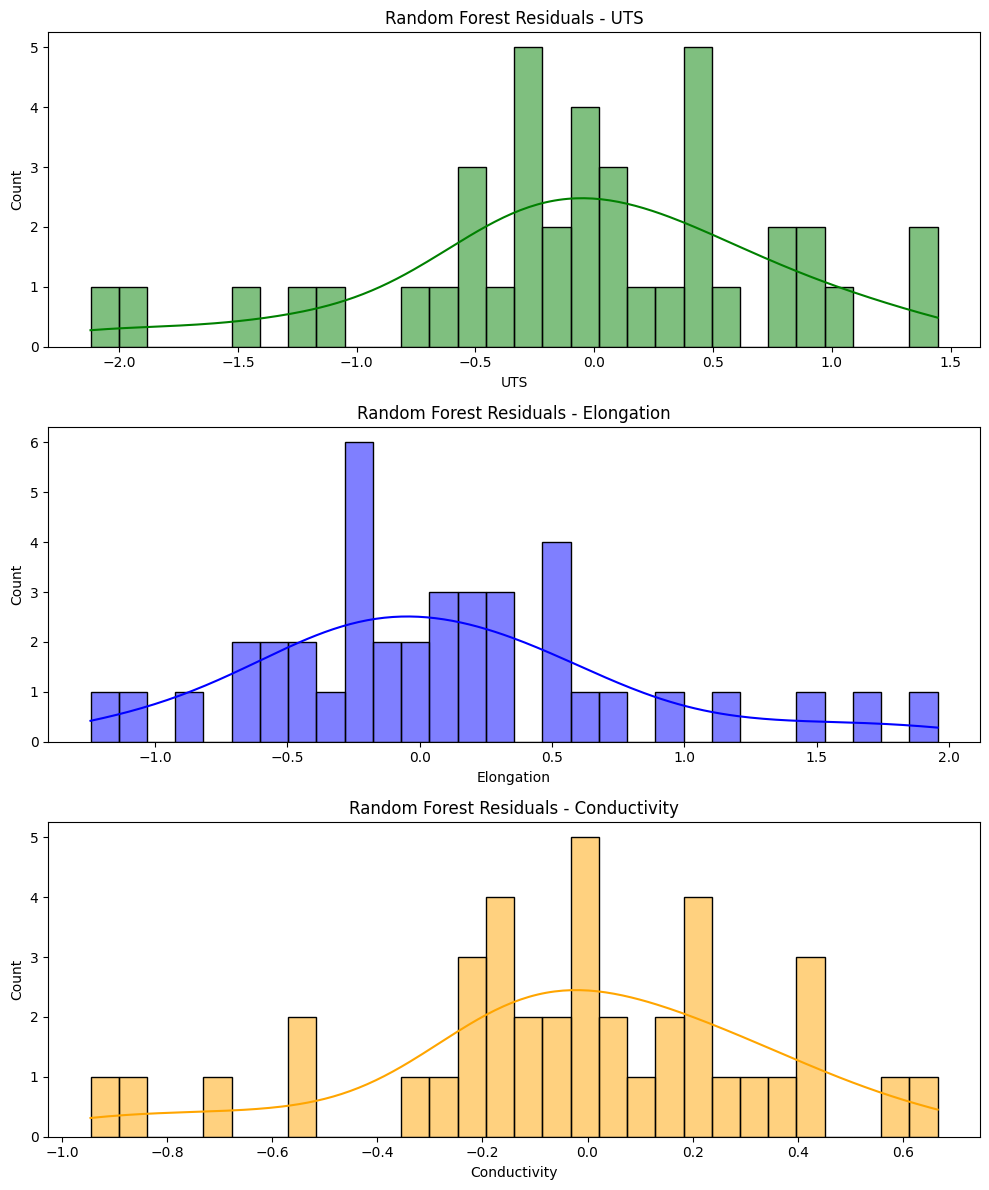

In [14]:
residuals_rf_uts = y_test_uts - y_pred_uts_rf
residuals_rf_elongation = y_test_elongation - y_pred_elongation_rf
residuals_rf_conductivity = y_test_conductivity - y_pred_conductivity_rf

# Plot residuals for UTS, Elongation, and Conductivity
plt.figure(figsize=(10, 12))

# UTS Residuals
plt.subplot(3, 1, 1)
sns.histplot(residuals_rf_uts, bins=30, kde=True, color="green")
plt.title('Random Forest Residuals - UTS')

# Elongation Residuals
plt.subplot(3, 1, 2)
sns.histplot(residuals_rf_elongation, bins=30, kde=True, color="blue")
plt.title('Random Forest Residuals - Elongation')

# Conductivity Residuals
plt.subplot(3, 1, 3)
sns.histplot(residuals_rf_conductivity, bins=30, kde=True, color="orange")
plt.title('Random Forest Residuals - Conductivity')

plt.tight_layout()
plt.show()

In [15]:
from sklearn.model_selection import cross_val_score

# Cross-validation for UTS using rf_uts model
cv_scores_rf_uts = cross_val_score(rf_uts, X, y_uts, cv=5, scoring='r2')
print(f"\nRandom Forest Cross-Validation R² scores for UTS: {cv_scores_rf_uts}")

# Cross-validation for Elongation using rf_elongation model
cv_scores_rf_elongation = cross_val_score(rf_elongation, X, y_elongation, cv=5, scoring='r2')
print(f"\nRandom Forest Cross-Validation R² scores for Elongation: {cv_scores_rf_elongation}")

# Cross-validation for Conductivity using rf_conductivity model
cv_scores_rf_conductivity = cross_val_score(rf_conductivity, X, y_conductivity, cv=5, scoring='r2')
print(f"\nRandom Forest Cross-Validation R² scores for Conductivity: {cv_scores_rf_conductivity}")



Random Forest Cross-Validation R² scores for UTS: [0.9131014  0.91894396 0.93517683 0.86414601 0.95110457]

Random Forest Cross-Validation R² scores for Elongation: [0.86547376 0.88014109 0.91000624 0.83397463 0.93037851]

Random Forest Cross-Validation R² scores for Conductivity: [0.91733422 0.9267166  0.93931761 0.87014686 0.93740859]


In [16]:
import joblib

# Save SVM model
joblib.dump(rf_uts, 'rf_uts_model.pkl')
joblib.dump(rf_elongation, 'rf_elongation_model.pkl')
joblib.dump(rf_conductivity, 'rf_conductivity_model.pkl')


['rf_conductivity_model.pkl']

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define a pipeline for automating prediction process
pipeline_uts = Pipeline([
    ('scaler', StandardScaler()),  # Assuming scaling is needed
    ('model', rf_uts)
])
pipeline_elongation = Pipeline([
    ('scaler', StandardScaler()),  # Assuming scaling is needed
    ('model', rf_elongation)
])
pipeline_conductivity = Pipeline([
    ('scaler', StandardScaler()),  # Assuming scaling is needed
    ('model', rf_conductivity)
])

# Fit pipeline on entire dataset
pipeline_uts.fit(X, y_uts)
pipeline_elongation.fit(X, y_elongation)
pipeline_conductivity.fit(X, y_conductivity)

# Save the entire pipeline
joblib.dump(pipeline_uts, 'prediction_pipeline_rf.pkl')
joblib.dump(pipeline_elongation, 'prediction_pipeline_elongation.pkl')
joblib.dump(pipeline_conductivity, 'prediction_pipeline_conductivity.pkl')

# Predict with new data (example new_data is a new observation)
new_data = np.array([[99.6, 0.2, 0.15, 710, 20, 2.0, 520, 70, 3, 4]])  # Example new data point
prediction_uts = pipeline_uts.predict(new_data)
prediction_elongation = pipeline_elongation.predict(new_data)
prediction_conductivity = pipeline_conductivity.predict(new_data)
print(f"Prediction for uts new data: {prediction_uts}")
print(f"Prediction for elongation new data: {prediction_elongation}")
print(f"Prediction for conductivity new data: {prediction_conductivity}")

Prediction for uts new data: [59.14295684]
Prediction for elongation new data: [133.76057418]
Prediction for conductivity new data: [13.81069841]


c:\Users\shash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\shash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\shash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
